# League of Legends 13.13

Author: Brian H. Bui (brianhb@uci.edu)

Course Project, UC Irvine, Math 10, Summer 2023

## Introduction

![](EGS_LeagueofLegends_RiotGames_S1_2560x1440-2935d0a3e332decb8e727fe56789b6ab.jpg)

League of Legends, made by Riot Games,is a free to play Multiplayer Online Battle Areana (MOBA) video game where a team of players duke it out against an opposing team of players where every player plays a certain champion,in which there are a variety, to accomplish a victory at the end of the game. League of Legends is that type of game that runs on patches or updates. Each patches will see some champions, items, or other components get buffed (beneficial boost in effectivenes) and nerf(a decrease in effectiveness) to balance the game and create an environment of fairness. As a hobby of mine is playing games, with League of Legends being one of my favorites, I thought I would analyze data involving League. 

The provided data is on champions on League of Legends Patch 13.13, I intend on analyzing the champions on League of Legends, using what was learned in Math 10 , to find any relationship in the data visually and explore champions performances based off their associated rates or features. 

## Importing and loading the Data

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Here, I am uploading the data and getting a good look at it to make sure everything is running smoothly. I am also checking the amount of the features belonging to certain colummns.

### Column names and features

Here is the column names and a description of what is each in column:

* Name - Champion names (ex. Aatrox)
* Class - Champions are either a Fighter, Assasin, Mage, Marksman, Support, or Tank
* Role - Top, Jungle, Mid, ADC, or Support 
* Tier - Ranking of how the champion is on the patch. Highest tier to lowest is God, S, A, B, C, D
* Score - Champion overall score
* Trend - Trend of the champion's score
* Win % - Win rate/percentage of the champion
* Role % - Role rate/percentage of the champion
* Pick % - Pick percentage of the champion
* Ban % - Ban percentage of the champion
* KDA - the champion's Kill/Death/Assist ratio

Champions in the `Name` column are sorted alphabetically A-Z. 

In [2]:
df = pd.read_csv("./League of Legends Champion Stats 13.13.csv", sep=';') #reading the csv file
df #running the df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,71.25,-3.39,48.84%,92.28%,7.01%,5.81%,1.85
1,Ahri,Mage,MID,God,77.12,-5.03,50.90%,95.23%,10.63%,6.47%,2.63
2,Akali,Assassin,MID,A,55.37,-5.08,48.18%,78.45%,5.99%,8.10%,2.30
3,Akali,Assassin,TOP,C,36.35,-0.60,48.50%,20.39%,1.45%,8.10%,2.06
4,Akshan,Marksman,MID,B,47.25,-1.50,50.15%,69.32%,2.88%,5.94%,2.16
...,...,...,...,...,...,...,...,...,...,...,...
242,Zilean,Support,MID,A,52.02,4.90,53.91%,13.72%,0.31%,0.76%,3.52
243,Zilean,Support,SUPPORT,B,45.21,1.15,50.12%,82.08%,2.11%,0.76%,3.03
244,Zoe,Mage,MID,A,49.82,1.34,50.44%,86.34%,2.98%,1.93%,2.60
245,Zoe,Mage,SUPPORT,D,32.21,-1.45,48.67%,11.43%,0.40%,1.97%,2.11


In [3]:
df.shape

(247, 11)

As the dataset shows, there are 247 rows and 11 columns. However there are some champions with that can be played at different roles, hence why you see duplicates of them, such as Akali. 

Below, we are exploring the dataset more as we want to see the amount of values certain columns have. 

In [4]:
df[["Name", "Class", "Role","Tier"]].nunique()

Name     163
Class      6
Role       5
Tier       6
dtype: int64

In [5]:
df.describe()

,Score,Trend,KDA
count,247.000000,247.000000,247.000000
mean,49.999798,-0.233725,2.317976
std,14.321673,4.759629,0.434993
min,20.780000,-23.490000,1.320000
25%,40.020000,-2.150000,2.020000
50%,47.380000,0.030000,2.280000
75%,56.375000,2.170000,2.600000
max,92.980000,13.940000,4.180000


In [6]:
df.Tier.value_counts()

A      62
B      62
C      37
S      37
D      25
God    24
Name: Tier, dtype: int64

The A and B are the most common tiers for champions, with God being the least common tier. This is reasonable as there should limit amounts of champions are God Tier (or overpowered/OP) to make the game state fair.

## Cleaning the Data

As the data shows, there appears to be no columns that contain any missing values. Since there is no missing values, we will not need execute df.dropna() as there a value that is in each space. 

In [7]:
df.isna().any()

Name      False
Class     False
Role      False
Tier      False
Score     False
Trend     False
Win %     False
Role %    False
Pick %    False
Ban %     False
KDA       False
dtype: bool

In [8]:
df.isna().sum(axis=0)

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

#### Converting datatypes

In [9]:
df["Win %"] = df["Win %"].replace(to_replace="%", value=" ", regex=True)
df["Role %"] = df["Role %"].replace(to_replace="%", value=" ", regex=True)
df["Pick %"] = df["Pick %"].replace(to_replace="%", value=" ", regex=True)
df["Ban %"] = df["Ban %"].replace(to_replace="%", value=" ", regex = True)

Some columns have an object dtypes which can be converted into floats that may be useful for later purposes. We are going to convert these columns dtypes.

In [10]:
df["Win %"] = df["Win %"].astype('float')
df["Role %"] = df["Role %"].astype('float')
df["Pick %"] = df["Pick %"].astype("float")
df["Ban %"] = df["Ban %"].astype("float")

Checking the dytpes to make sure the new columns changed from object to float

In [11]:
df.dtypes

Name       object
Class      object
Role       object
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

## Data Visualization

### Giving Context: 

A question League of Legends players have is what kind of champions is good to pick during a match.  Each player is playing a certain champion in 1 of the 5 roles in a match. As mentioned earlier, League of Legends is run on patches. On each patch, some champions receive a buff while other are nerfed. This is a factor that influences both the win and pick rate of different champions among the 5 roles. As the goal of every League player is to win their match to boost their serotonin, players tend play champions associated with a high winrate more to guarantee a victory, else they will feel sad from a defeat. Champions with a higher winrate and high score rating, attracts more players to play them. Let's visualize the data with `x=Win %` and `y=Score`

In [12]:
sel = alt.selection_interval()

c = alt.Chart(df).mark_circle().encode(
    x=alt.X("Win %", scale=alt.Scale(zero=False)),
    y="Score",
    color="Tier",
    tooltip=["Win %","Score"],
).add_selection(sel)

c

alt.Chart(...)

Looking at the scatterplot, it seems to be that champions of a lower Win rate(%) tend to have a lower score than those whose winrate are higher. It seems, that there might be a  relation between Win % and Score, which we will check soon. Most players will not want to play a champion that has a low win rate because people associate these champions with defeats in matches they are played in and instead play champions that have a high win rate, since they are associated with victories in matches. Also, as points are distinct by [Champion] `Tiers`, we can conclude that the higher tiers champions (like God,S,A) will have a better score there is. This leads us to see explore the champion's tier with their associated win, pick, ban rate, and KDA.

In [13]:
c1 = alt.Chart(df).mark_bar().encode(
    x="Tier",
    y="mean(Win %)",
)
c2 = alt.Chart(df).mark_bar().encode(
    x="Tier",
    y = "mean(Pick %)",
)

c3 = alt.Chart(df).mark_bar().encode(
    x="Tier",
    y="mean(Ban %)",
)
c4 = alt.Chart(df).mark_bar().encode(
    x="Tier",
    y="mean(KDA)"
)

c1|c2|c3|c4

alt.HConcatChart(...)

The bar graphs show the distribution of the mean of `Win %`, `Pick %`, `Ban %`, and `KDA` in relation to Champion tiers. You many recognize that lower tiers, C and D, have some of the lowest Win %, Pick %, Score, and KDA. This is because lower tiers are nerfed champions or others that are inferior to the buffed champions when it comes to battling them on the summoner rift (game map). So people shy away from these lower tier champs. 

## Regressions and Classifiers 

Here, we will use different Regression methods on the champions to explore correlations between other columns in the dataset

### Linear Regression Model for Champions' Win Rate and Score

In [14]:
reg = LinearRegression()
reg.fit(df[["Win %"]],df["Score"])
reg.predict(df[["Win %"]])
df["Pred"] = reg.predict(df[["Win %"]])

In [15]:
c4 = alt.Chart(df).mark_circle().encode(
    x = alt.X("Win %", scale=alt.Scale(zero=False)),
    y = "Score"
)

c5 = alt.Chart(df).mark_line(color="red").encode(
    alt.X("Win %", scale=alt.Scale(zero=False)),
    y = "Pred"
)

c4 + c5

alt.LayerChart(...)

Looking at the linear regression model, there is looks to be a small correlation between `Win %` and `Score` in regards to champions since the line appears to be a shallow slope. This means there is a gradual change between the axis. But, using this information, we will try to see later if these scores and win % can help us predict role the champion with these win rates and score is played in since the 5 roles is vital in the League of Legends game. 

### Using Linear Regression and Train Test Split 

The previous graph saw only Win % in relation to score. What if we were to include the other columns as well along with Win % to see if there correlation to the score. This is where we will explore this.

In [16]:
#Adapted from the Kaggle Notebook analyzing this data. Reference #1:  
df2 = df.copy()
df2.drop("Name", axis=1, inplace=True)
df2["Class"] = df2["Class"].map({"Support":0, "Assassin":1, "Tank":2, "Marksman":3, "Mage":4, "Fighter":5})
df2["Role"] = df2["Role"].map({"TOP":0, "JUNGLE":1, "MID":2, "ADC":3, "SUPPORT":4})
df2["Tier"] = df2["Tier"].map({"God":0, "S":1, "A":2, "B":3, "C":4, "D":5})

In [17]:
X = df2.drop("Score", axis=1)
y = df2["Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)
y_pred_reg1 = reg1.predict(X_test)

In [19]:
reg1.score(X_train, y_train)

0.927373864278309

The prediction accuracy for the training set appears to be similar to the test set. These similar values suggest that overfitting is not a big serious concern.

In [20]:
reg1.score(X_test, y_test)

0.9299849474649416

In [21]:
reg1.coef_

array([ 2.48148142e-02, -3.98702563e-01, -6.96542621e+00,  2.66049403e-01,
        8.33215784e+12, -1.60632604e-02,  1.12747254e+00,  2.26218621e-01,
        8.33983920e-01, -4.21968680e+12])

In [22]:
reg1.intercept_

-208122704447353.3

<AxesSubplot:xlabel='Score'>

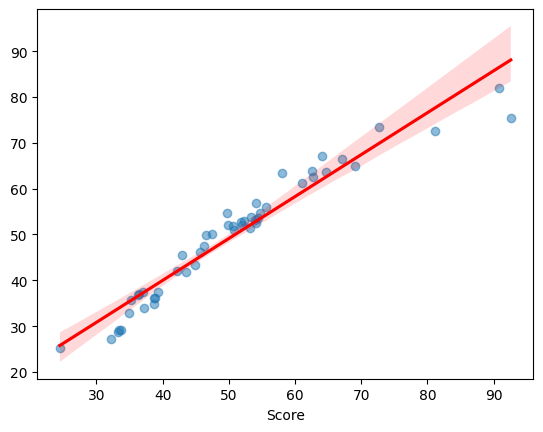

In [23]:
#Asked Chat GPT how to plot a regression graph using seaborn. Reference #2 
sns.regplot(x=y_test, y=y_pred_reg1, scatter_kws={'alpha':0.5},line_kws={'color':'red'})

The graph here shows a more steep slope between Scores the other columns used in the model compared to the slope we saw earlier. The steeper slope indicates there is a more significant change and that there is a postive correlation between scores and all the columns that were used. 

### Random Forest Regressor

In [24]:
df_err = pd.DataFrame(columns=['leaves','error', 'set'])
for i in range(2,100):
    rfr = RandomForestRegressor(max_leaf_nodes=i)
    rfr.fit(X_train, y_train)
    d1 = {"leaves": i, "error": (1 - rfr.score(X_train, y_train)), "set":"train"}
    d2 = {"leaves": i, "error": (1 - rfr.score(X_test, y_test)), "set": "test"}
    df_err.loc[len(df_err)] = d1
    df_err.loc[len(df_err)] = d2

In [25]:
alt.Chart(df_err).mark_line().encode(
    x="leaves",
    y = "error",
    color = "set",
)

alt.Chart(...)

The blue curve represents the score of score of champions while the orange line is representing the predicted score. Here, the test error curve shows how a max_leaf_nodes = 10 produces a slightly different result since it is the instance where the slope changes from negative to positive. 

### Logistics Regression for predicting Mid lane champions

There are 5 roles that players have to select in a League of Legends match. MID, however, is one of the common roles people opt to play. A reason for this because of a famous and popular competitive player named "Faker" who is pictured below. As the Mid role has best potential to get many kills and deaths/assists, it will have a great influencing a victory or defeat of a match, thus attracting many players to play Mid role champions. So lets focus on the Mid lane role

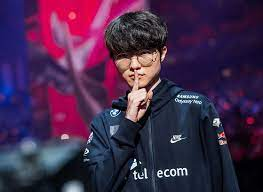

In [26]:
#extra
from PIL import Image
img = Image.open("faker.jpg") #Go Faker and T1!
img.show()

In [27]:
df["isMid"] = (df["Role"] == "MID")
df["Mid Champs"] = df["isMid"].astype(int)

In [28]:
c5 = alt.Chart(df).mark_circle().encode(
    x="Win %",
    y="Mid Champs"
) 
c6 = alt.Chart(df).mark_circle().encode(
    x="Score",
    y="Mid Champs"
)
c5|c6

alt.HConcatChart(...)

In [29]:
clf = LogisticRegression()
clf.fit(df[["Win %"]],df["Mid Champs"])
df["pred win"] = clf.predict(df[["Win %"]])
c7 = alt.Chart(df).mark_circle(color="red").encode(
    x="Win %",
    y="pred win"
)
winning = clf.predict_proba(df[["Win %"]])
df["pred_win1"] = winning[:,1]
c8 = alt.Chart(df).mark_circle(color="orange").encode(
    x="Win %",
    y="pred_win1"
)
c7|c8+c5

alt.HConcatChart(...)

Here we see the the graph ,c7, predicts what the Mid lane champions are based off wins. This is difficult to predict since other champions will have similar winrates. Meanwhile, the c8+c5 graphs show a bit of a logistic regressive curve, in which the curve shows that mid role champions have win % around the 45-50 % for their win rates. So, it is a 50 % chance of defeat or victory in a game match if a player plays a mid role champion. Below we will do the same with Score.

In [30]:
clf.fit(df[["Score"]],df["Mid Champs"])
df["pred_score"] = clf.predict(df[["Score"]])
c9 = alt.Chart(df).mark_circle(color="black").encode(
    x="Score",
    y="pred_score"
)
scoring = clf.predict_proba(df[["Score"]])
df["pred_score1"] = scoring[:,1]
c10 = alt.Chart(df).mark_circle(color="brown").encode(
    x="Score",
    y="pred_score1"
)
c9|c10+c6

alt.HConcatChart(...)

Graph c9 shows what the champions that might be in the mid role based on their score. This is hard to predict since the League of Legends champions in other roles may have similar scores. Graph c6+c10 is not showing a binary regression and instead is showing flat line. 

### Train Test Split on Mid lane Champions

Let's classify if a champion is played in the Mid Role based off the scores and win %.

In [31]:
winscore = ["Win %", "Score"]
X_train, X_test, y_train, y_test = train_test_split(df[winscore], df["Mid Champs"], test_size=0.2,random_state=42)

In [32]:
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)
(clf1.predict(X_test) == y_test).sum()

36

It seems we were correct 36 times.

I am checking the accuracy score for the model's prediction on both the test and train set

In [33]:
a = clf1.score(X_test,y_test)
b = clf1.score(X_train,y_train)
print(a,b)

0.72 0.7563451776649747


Now I want to check the probability of the model of guessing a midlane champion when I give it a randon Win % and a Score to see 

In [34]:
clf1.coef_

array([[ 0.18522227, -0.01327282]])

In [35]:
#Sigma function introduced in lecture was helpful for me creating a probability function. Reference #3
Winrate_coef, Score_coef = clf1.coef_[0]
Winrate = 50.5
Score = 50
sigmoid = lambda x:1/(1+np.exp(-x))
prob = sigmoid(Winrate_coef*Winrate + Score_coef*Score + clf1.intercept_)
prob[0]

0.24291947112459267

The probability of model prediction when the win(%) rate is 50.5 and score is 50 is 24 % that the champion is in the mid lane role. 

In [36]:
log_loss(y_train, clf1.predict_proba(X_train))

0.5455532301898017

The value for the measure of uncertainty for the train data is alittle high which suggests that there is a chance for errors.

In [37]:
log_loss(y_test, clf1.predict_proba(X_test))

0.5836294924200414

Here is the measure of uncertainty for the test data. The value is near the train data, but alittle greater.

### Decision Tree Clasifier

We have an initial instantiation with `max_leaf_nodes` = 10, which is a guess to see what the results look like 

In [38]:
clf3 = DecisionTreeClassifier(max_leaf_nodes=10)
clf3.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

In [39]:
clf3.score(X_train, y_train)

0.8324873096446701

In [40]:
clf3.score(X_test, y_test)

0.72

In [41]:
df_err1 = pd.DataFrame(columns = ['leaves', 'error', 'set'])

for i in range(2,50):
    dtc = DecisionTreeClassifier(max_leaf_nodes=i)
    dtc.fit(X_train, y_train)
    d3 = {"leaves": i, "error": (1 - dtc.score(X_train, y_train)), "set":"train"}
    d4 = {"leaves": i, "error": (1 - dtc.score(X_test, y_test)), "set": "test"}
    df_err1.loc[len(df_err1)] = d3
    df_err1.loc[len(df_err1)] = d4


In [42]:
alt.Chart(df_err1).mark_line().encode(
    x = alt.X("leaves", scale=alt.Scale(zero=False)),
    y = alt.Y("error", scale=alt.Scale(zero=False)),
    color = "set"
)


alt.Chart(...)

From what the graph shows, the model did not produce favorable results with the max_leaf_nodes = 9. It shows the model is not a good predictor for "mid role" champions.

In [43]:
log_loss(y_train, clf3.predict_proba(X_train))

0.3819817067141626

In [44]:
log_loss(y_test, clf3.predict_proba(X_test))

1.252284030721461

The value produced by the test set is significantly higher than the training set. This indicates the clf3 model, which was defined as Decision Tree Classifier, is not an adequate model for predictions.

### Random Forest Classifier

In [45]:
rfc = RandomForestClassifier(max_leaf_nodes=9, n_estimators=200)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=9, n_estimators=200)

In [46]:
rfc.score(X_train, y_train)

0.8527918781725888

In [47]:
rfc.score(X_test, y_test)

0.7

The score of the test set is lower than the train set. It indicates that the Random Forest Classifier model is not an adequate model in predicting mid role champions. 

### K-Neighbors Regressors

In [48]:
# the codes throughout this section was adapted from Professor Davis K-Nearest Neighbors notes. Reference #4

I am going to use K-Neighbors Regressor to find out if there is a relationship between the Win % + Score and Pick %. 

In [49]:
X_trainP, X_testP, y_trainP, y_testP = train_test_split(df[winscore],df["Pick %"], train_size=0.2)

In [50]:
reg2 = KNeighborsRegressor(n_neighbors=10)
reg2.fit(X_trainP, y_trainP)

KNeighborsRegressor(n_neighbors=10)

In [51]:
reg2.predict(X_testP)

array([1.054, 5.693, 3.375, 1.204, 1.588, 3.411, 5.815, 1.598, 9.187,
       1.093, 6.869, 3.823, 1.279, 2.277, 5.815, 3.157, 2.227, 0.862,
       2.351, 0.862, 6.557, 3.514, 1.093, 3.147, 1.093, 3.411, 0.848,
       1.572, 6.557, 0.862, 1.23 , 2.81 , 5.827, 6.869, 2.84 , 2.493,
       4.718, 2.212, 9.187, 5.693, 4.396, 1.093, 5.815, 1.054, 3.135,
       2.536, 6.869, 3.289, 9.187, 2.351, 1.054, 4.062, 2.782, 0.848,
       2.657, 2.84 , 1.857, 1.598, 6.557, 5.815, 3.157, 9.187, 9.187,
       2.84 , 1.572, 3.394, 1.598, 3.228, 1.404, 9.187, 5.566, 0.862,
       1.642, 4.075, 5.599, 5.815, 3.228, 3.147, 6.416, 2.36 , 3.375,
       2.605, 2.84 , 3.446, 2.605, 2.242, 0.862, 5.815, 2.227, 9.187,
       0.848, 4.075, 3.093, 9.187, 2.829, 5.815, 6.869, 2.36 , 6.869,
       5.693, 2.431, 1.572, 2.605, 9.187, 1.553, 5.815, 3.411, 0.862,
       4.273, 1.461, 2.84 , 3.411, 2.536, 6.557, 2.113, 3.093, 2.36 ,
       0.862, 3.446, 3.618, 3.823, 2.536, 3.17 , 0.862, 2.964, 2.907,
       2.461, 2.277,

The above output shows the prediction of the Pick % in test data.

In [52]:
X_testP.shape

(198, 2)

In [53]:
mean_absolute_error(reg2.predict(X_testP), y_testP)

1.1866060606060604

In [54]:
mean_absolute_error(reg2.predict(X_trainP), y_trainP)

1.2469795918367346

The MAE for the test set and train set are similar or in close proximity to each other. Reg performs slightly better on the training data. 

In [55]:
def get_scores(k):
    reg2 = KNeighborsRegressor(n_neighbors=k)
    reg2.fit(X_trainP, y_trainP)
    train_error = mean_absolute_error(reg2.predict(X_trainP), y_trainP)
    test_error = mean_absolute_error(reg2.predict(X_testP), y_testP)
    return (train_error, test_error)

In [56]:
get_scores(10)

(1.2469795918367346, 1.1866060606060604)

In [57]:
df_scores = pd.DataFrame({"k":range(1,50), "train_error":np.nan,"test_error":np.nan})

In [58]:
for i in df_scores.index:
    df_scores.loc[i,["train_error","test_error"]] = get_scores(df_scores.loc[i,"k"])

In [59]:
df_scores["kinv"] = 1/df_scores.k

In [60]:
ctrain = alt.Chart(df_scores).mark_line().encode(
    x="kinv",
    y="train_error"
)

In [61]:
ctest = alt.Chart(df_scores).mark_line(color="orange").encode(
    x="kinv",
    y="test_error"
)

In [62]:
ctrain + ctest

alt.LayerChart(...)

So the blue curve (line) is the training error while the orange curve is test eror. From observing the graph, we notice that underfitting occurs for high values ofK whereas overfiting occurs at smaller values of K.

## Plots

Now after looking at models and whether there was an adequate one for prediction, let's take a look of all the champions and their Win % and Ban %. As there are many champions that all have different kinds of buffs, nerfs, and character skills (which are used for killing the enemy team champions) in the game, they will each have have a certain Win % and also Ban %. It is why there are different win and ban rates scattered around the scatter plot. 

In [63]:
px.scatter(df, x="Win %", y="Ban %", color="Name", title = "LOL Champions win and ban rate")

## Extra(Box Plot)

In [64]:
px.box(df, "Score", points="all",hover_data=["Name"],width=500)

This short code, using plotly, displays the distribution of all the champion's scores in the data (this is similar to checking distribution on student's performances on exams). We can use our mouse to hover over and get the details of min, median, max, q1 & q3, and the lower and upper fences. The box plot seems to show a normal distrubtion in regards to champions' scores. This means that it's symmetric, equally likely for scores to be above or below the mean, and scores are more likely to occur at the mean than further away.

In [65]:
#Wanted to create a graph that also included boxplots/similar plots to a boxplot. Reference #5
fig = px.scatter(df, x="Pick %", y="Trend", color="Tier", marginal_x="box", marginal_y="violin", template="simple_white")
fig.show()

Here we are exploring the Pick % and Trend all champion tiers. It seems like low champion tiers have low pick % and have trends usually ranging between -10 and 10, with some points being outside the interval. Of course, the GOD tier champions have some higher Pick % (rate) and trends compared to the others. At the top are boxplots where we can see the pick % min,max,median,etc of the different tiers. At the right, we can see violin plots which also allows min,max,median,etc but for Trend.

## Plots

### What are the best and worst champions in each tier?

In [66]:
#I wanted to create a graph on the best and worst champions but was having trouble on producing the code, so I browsed through the Kaggle notebooks and found this. Reference #6

dfwoah = (df.groupby("Tier").apply(lambda x: x.loc[x["Score"].agg(["idxmin", "idxmax"])][["Score", "Name", "Role", "Win %"]]))

dfwoah = dfwoah.reset_index(level=1, drop=True).reset_index()

px.bar(dfwoah, "Name", "Score", "Tier")

The bar chart below shows the best and worst scoring champions of each tier. I grouped the color by tier to allow this. League has a variety of champions so of course, we should check out champions of other tiers as well. As the bar chart shows, the GOD tier champions still have the highest score compared to the other champions belonging to the other tiers out there. 

So, the God, S, and A tier champions increase one's chances of winning a League of Legends match, compared to the three other tiers. 

In this patch of 13.13, Kaisa and Rakan are the best champions in the patch as they are in the GOD tier, although Rakan has the worst score among the GOD tiers. The champions, Sion and Garen, are in S tier with of the highest scores after Kaisa and Rakan, so players could consider playing them in their match. Qiyana are Nocturne are also good for the patch as they are in the A tier and can could increase one's chances of victory in a match if they are played.

Since the GOD tier champions are the most powerful champions in the game, we will turn our attention to them. Below, are champions in the GOD tier of patch 13. The reason we are looking the GOD tier champions is because those champions, even with their score, are considered the appropriate champions to pick in the League patch of 13.13 to have a better chance of winning a match. Everyone on League of Legends wishes to know what the GOD tier champions are and which ones have a better score so they know which champion to play.

In [67]:
god_tier_df = df[df["Tier"] == "God" ]
god_tier_df

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA,Pred,isMid,Mid Champs,pred win,pred_win1,pred_score,pred_score1
0,Aatrox,Fighter,TOP,God,71.25,-3.39,48.84,92.28,7.01,5.81,1.85,47.117214,False,0,0,0.192282,0,0.251009
1,Ahri,Mage,MID,God,77.12,-5.03,50.90,95.23,10.63,6.47,2.63,51.184872,True,1,0,0.269534,0,0.251008
20,Blitzcrank,Tank,SUPPORT,God,79.03,4.56,50.96,97.14,8.78,23.80,2.37,51.303348,False,0,0,0.272054,0,0.251008
31,Darius,Fighter,TOP,God,89.77,2.57,49.01,92.99,8.46,19.04,1.80,47.452894,False,0,0,0.197962,0,0.251006
40,Ezreal,Marksman,ADC,God,72.99,-19.84,50.10,87.80,19.96,8.96,2.49,49.605199,False,0,0,0.237364,0,0.251009
55,Graves,Marksman,JUNGLE,God,72.71,1.85,50.77,91.21,8.58,4.98,2.65,50.928175,False,0,0,0.264123,0,0.251009
68,Jax,Fighter,TOP,God,92.58,-0.44,50.78,85.77,8.51,17.43,1.71,50.947921,False,0,0,0.264537,0,0.251006
75,Kai'Sa,Marksman,ADC,God,92.98,3.24,51.40,91.68,28.67,11.96,2.48,52.172168,False,0,0,0.290983,0,0.251006
85,Kayn,Fighter,JUNGLE,God,83.56,7.31,51.06,93.96,10.28,10.65,2.45,51.500807,False,0,0,0.276288,0,0.251007
88,Kha'Zix,Assassin,JUNGLE,God,89.93,-3.10,51.13,99.12,10.10,19.44,2.64,51.639028,False,0,0,0.279276,0,0.251006


In [68]:
#ChatGPT helped me set up the for if else loop, as I had forgotten how to set it up. Reference #7
idx_worst_score = god_tier_df["Score"].idxmin()
idx_best_score = god_tier_df["Score"].idxmax()

fig = px.bar(god_tier_df, "Name", "Score")
fig.update_traces(marker_color=["red" if idx == idx_worst_score else "green" for idx in god_tier_df.index])

The bar chart above shows all GOD tier champions with their scores. There are some GOD tier champions with a higher score others. We notice that there is one red bar and that is the GOD tier champion with the lowest score compared to the rest and that champion is Rakan. It connects with the earlier bar chart which shows the the champions with the best and worst score in each tier. Rakan had the worst score among the GOD tier champions. However, keep it mind that it is still a God Tier (very good) champion even though has low score than the rest of its God Tier champion counterparts.

## Summary

Either summarize what you did, or summarize the results.  Maybe 3 sentences.

To sum up what I did in this project, I mainly analyzed the data by using Logistic Regression to see if it was possible to predict if champions were played in the Mid Role based on the Win % and Score features. That was where I tried to train different machine learning models (Decision Tree Classifier, Random Forest Classifier). With the use of different libraries, I displayed the pattern and data in scatterplots, bar graphs, and line graphs. Overall, I found that the features of Win % and Score do not have a great impact towards predicting what champions are played in the mid role, even though they are important features for players to see which champions they should use in the game. The reason for this is because of how there are many champions in the game, which leads to various champions sharing similar statistics (Win %, Pick %, Ban %, Role %, KDA). Another reason was because of how there was overfitting. Thus, the classification models did not have much success in predicting whether champions were played in Mid. 

I also used Linear Regression to see if there was a positive correlation between Win % and Score, and also all the other features of the data in relations to Score. I found that there is a positive relation with both instances although Win % and Score did not have a high relation, as it had a shallow slope.

At the end, I explored all the distribution of all the Champions' Win % and Ban %, the Champion's Pick % and Trend, and the Champions' score as I wanted to see what the distribution looked with these features. I also had a DataFrame of Champions in their respective tiers to see what champions, given their names, are the best to play in League of Legends patch 13.13

## References

Your code above should include references.  Here is some additional space for references.

* What is the source of your dataset(s)?

My dataset came from [Kaggle](https://www.kaggle.com/datasets/vivovinco/league-of-legends-stats-s13?resource=download). Thank you to the publisher Vivo Vinco, for providing this dataset on Kaggle for me to use for the project. 

* List any other references that you found helpful.

Reference #1: In this code, I wanted to see a correlation between score and the other columns besides `Name` in the dataset. I wanted to map the categorical features in those columns in a ordinal order, so I adapted the code from the [Kaggle notebook 1](https://www.kaggle.com/code/kamalrajit/notebook68028c93a4) following a similar format.

Reference #2: In this code I used ChatGPT to help me create a single regression plot using Seaborn. This is the exact code ChatGPT gave me: `sns.regplot(x=y_test, y=y_pred_clf1, scatter_kws={'alpha':0.5}, line_kws={'color':'red})`

Reference #3: In this line of code, I used the idea of sigmoid function that was introduced in [Lecture 14](https://ybaki97.github.io/Math10-SSII23/lectures/lec13.html) of the class. The code that was given for the sigmoid function is here: `sigmoid = lambda x: 1/(1 + np.exp(-x))`. In addition to the sigmoid function, I also used a linear model to plug into the sigmoid function. The code that I adapted was similar to this code provided in the lecture: `sigmoid(flip_coef*flip + bill_coef*bill + clf.intercept_)`

Reference#4: I adapted the K-Neighbors codes from the Professor Davis notes on [K-Nearest Neighbors](https://christopherdavisuci.github.io/UCI-Math-10-W22/Week6/Week6-Wednesday.html)

Reference #5: In this line of code, I used plotly to have both scatter plot and box plots or plots similar a box plot appear simultaneously. I browsed through the [Plotly](https://plotly.com/python/plotly-express/) and found an example that I was looking for. I adapted this code into this line of code. The code from Plotly was: `fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", marginal_y="violin",marginal_x="box", trendline="ols", template="simple_white")`

Reference #6: In this line of code, I used Plotly to create a bar graph showing the best and worst scoring champions of all tiers. I was having trouble producing the output that I wanted with the bar graph. I, then browsed through Kaggle to look for notebooks analyzing similar datas that might have a bar graph and found a bar graph that produced the output I was looking for. It comes from [Kaggle notebook 2](https://www.kaggle.com/code/eyadamin1233/s13-3-basic-eda) and I had adapted this exact code here: `(df.groupby('Tier) .apply(lambda x: x.loc[x['Score].agg(['idxmin', 'idxmax'])] [['Score, 'Name', 'Role', 'Win]])) `


Reference #7: Here, I wanted to create a plotly bar graph showing all the God Tier champions and show which champion had the lowest score out of all. I realize that I needed to do a if else loop but I forgot how to set it up. The exact code ChatGPT provided is: `idx_worst_score = god_tier_df["Score"].idxmin()
idx_best_score = god_tier_df["Score"].idxmax()
fig = px.bar(god_tier_df, "Name", "Score")
fig.update_traces(marker_color=["red" if idx == idx_worst_score else "green" for idx in god_tier_df.index])`

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdaa54db-7e52-494a-8ca4-7621026e7e48' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>